# Digital Signal Processing

### MsCV - ViBOT - MAIA

The reasons to convert signals into frequency domain is to get the idea of different frequency components it is composed of. This might help to detect the required signals and classify them, for examples, speak or speech recognition from a sound wave, noise removal from the image, or finding recurring patterns within images. 

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal

Pretty printing has been turned OFF


# Discrete Fourier Transform
The Discrete Fourier Transform (DFT) converts discrete data from a time domain into frequency domain. The DFT analyzes the finite segment in one period of an infinitely extended periodic signal, which is defined as: 
$$ X[n] = \sum^{N-1}_{k = 0} x[k] e^{-j(2\pi/N)kn}$$


Note: The Fast Fourier Transform (FFT) is simply an algorithm to compute the DFT in a faster way!

## Exercise 1 -  ** DFT** 
**1.1** The DFT of a $5$ Hz sin wave sampled with the sampling of $f_s = 50$ Hz over 1000 (N = 1000) samples is computed as follows:


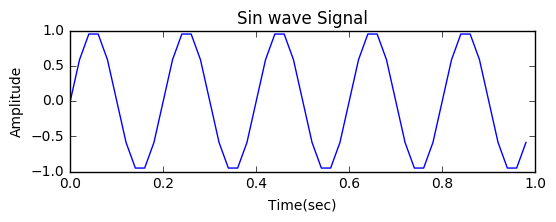

/home/dani/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


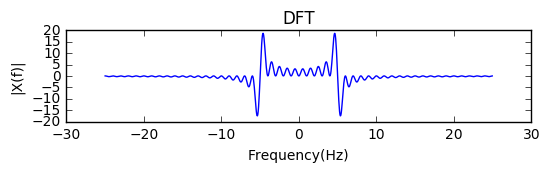

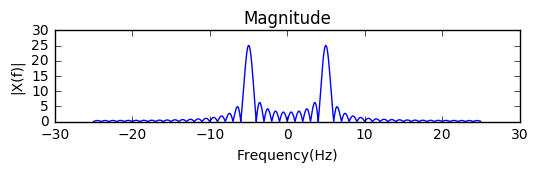

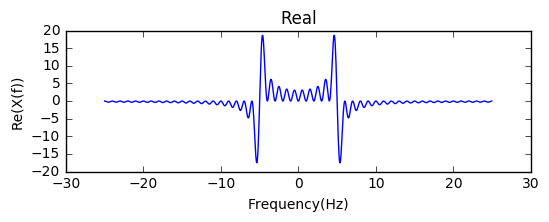

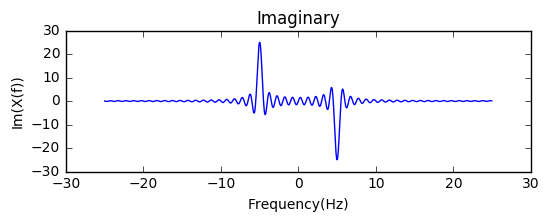

In [2]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.sin(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Sin wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()


**1.2** Compute the DFT of a cosine wave, how that differs from that of a sine wave ?

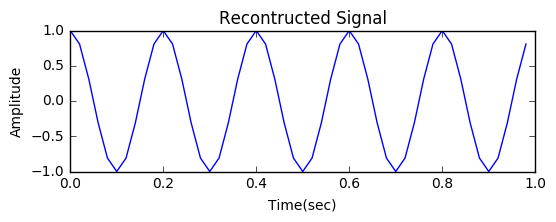

/home/dani/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


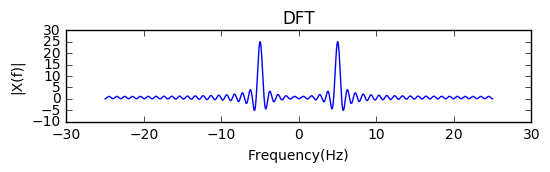

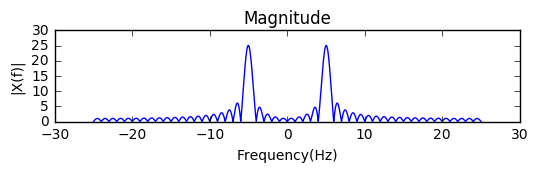

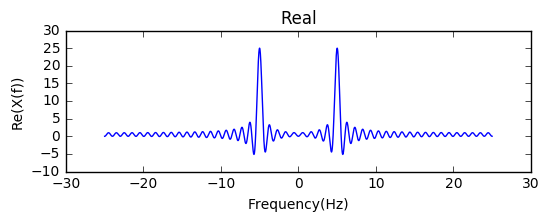

In [3]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.cos(2*np.pi*f*t)
# Number of samples 
N = 10000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Recontructed Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()


**1.3** Use square wave using the same frequncy and sampling frequency.

Note use `signal.square` to create your signal. 

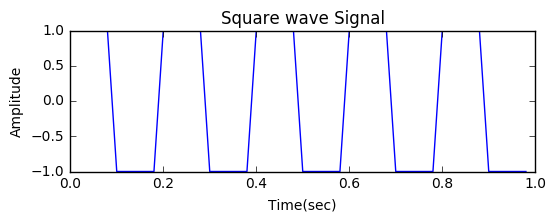

/home/dani/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


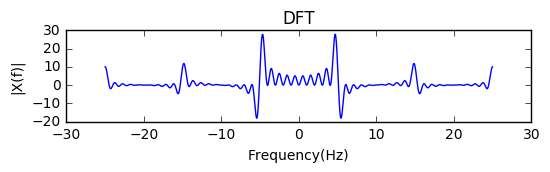

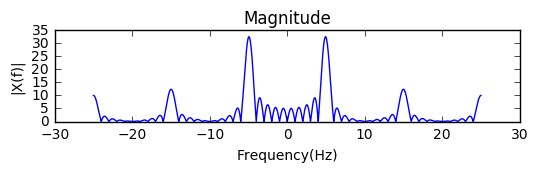

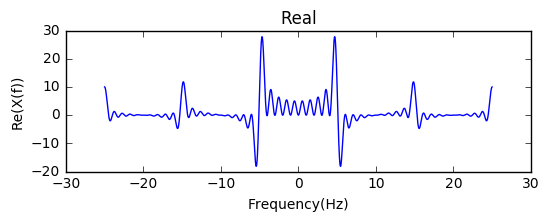

In [4]:
# Signal frequency and sampling frequency
f = 5.
fs = 50  #increase frequency for a more squared wave
# time vector for one second
t = np.arange(0, 1., 1./fs)
#t = np.linspace(0, 1, fs, endpoint=False)
# square wave 
x_n = signal.square(2 * np.pi * 5 * t)
# Number of samples 
N = 10000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Square wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()


**1.4** Use white Gaussian noise N = 10000. 

(Note use `np.random.normal` to create your noise) 

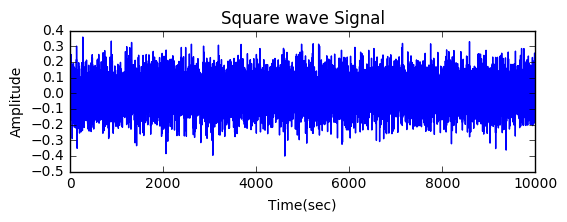

/home/dani/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


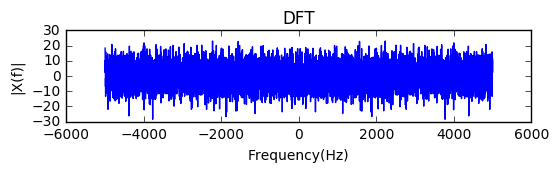

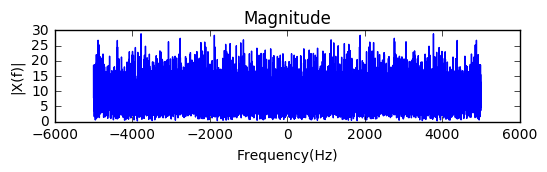

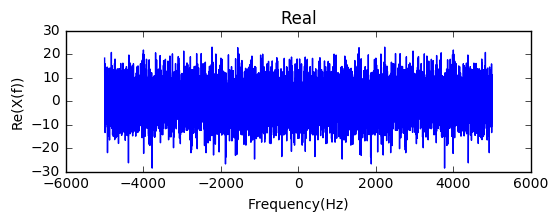

In [5]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)


# Signal frequency and sampling frequency
f = 5.
fs = 50  #increase frequency for a more squared wave
# time vector for one second
t = np.arange(0, 10000)
#t = np.linspace(0, 1, fs, endpoint=False)
# square wave 
#x_n = signal.square(2 * np.pi * 5 * t)
x_n = np.random.normal(mu, sigma, 10000)

# Number of samples 
N = 10000
# frequency vector
fr = (np.arange(-N/2,N/2,1))
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Square wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

## Exercise 2 -  Sampling 

Generate and display the following signals of 1 sec duration.
$$x[n] = 3 cos(2\pi\frac{f_{1}}{f_{s}}n) + 4 sin(2\pi\frac{f_{2}}{f_{s}}n)$$
for $f_{1} = 5$ Hz and $f_{2} = 20$ Hz, sampled with the sampling frequencies of $f_{s} = [10, 20, 25, 40, 50, 100, 150]$


**2.1** Plot $x[n]$ for different sampling frequencies in time domain.

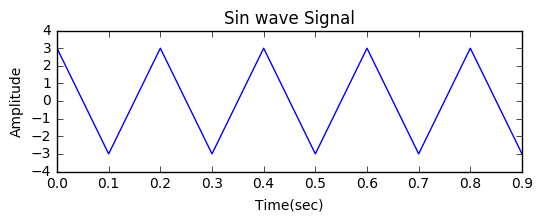

/home/dani/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


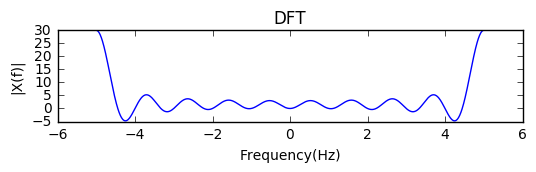

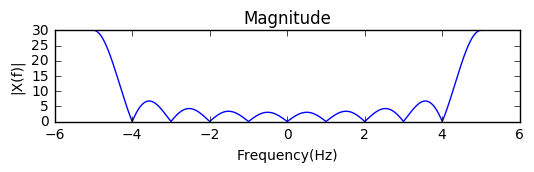

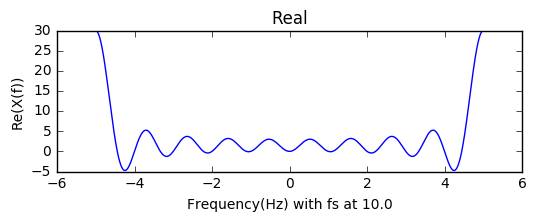

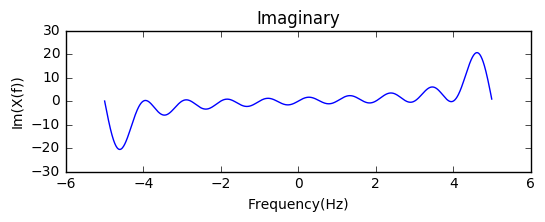

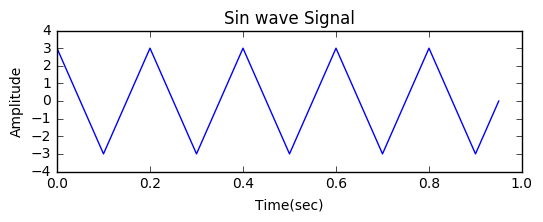

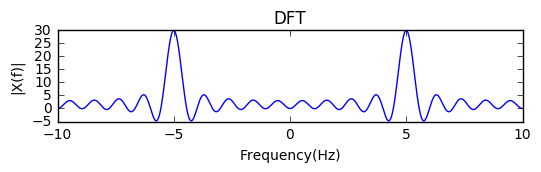

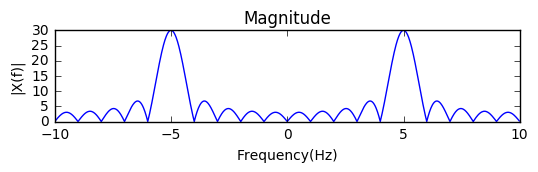

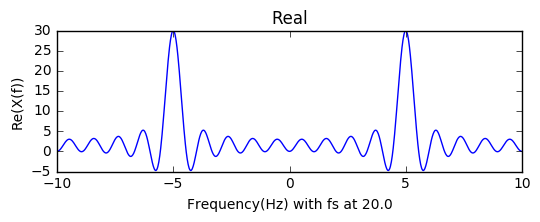

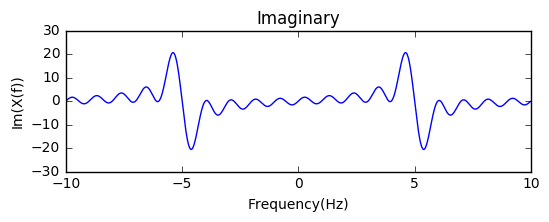

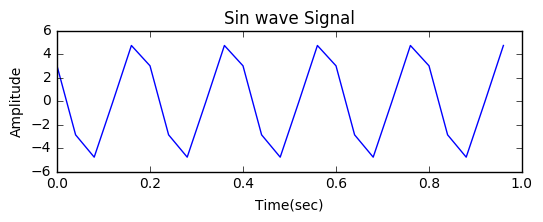

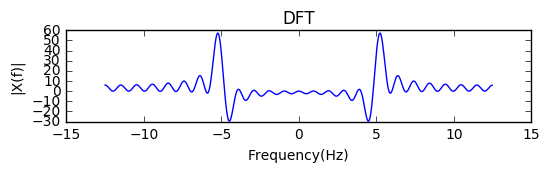

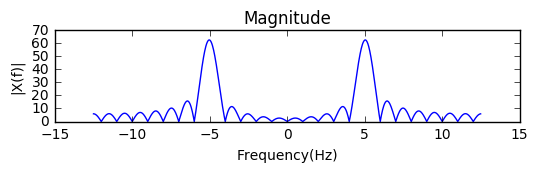

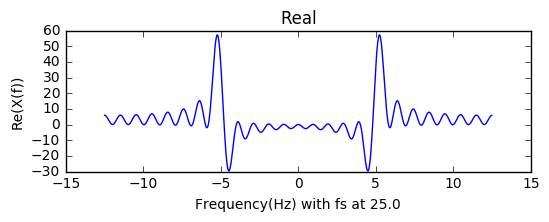

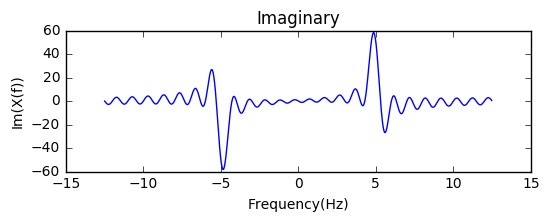

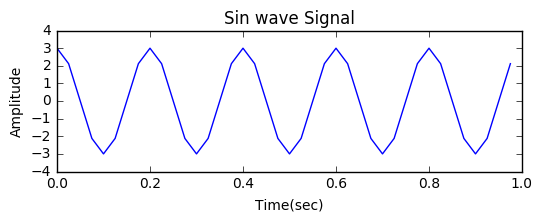

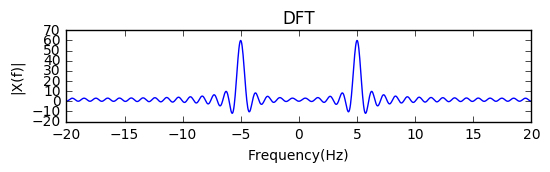

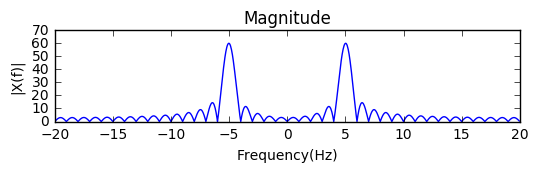

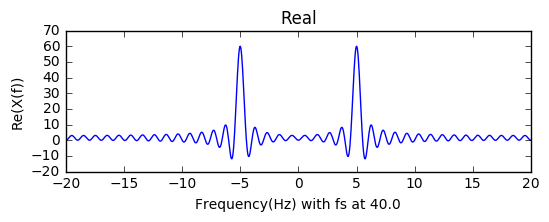

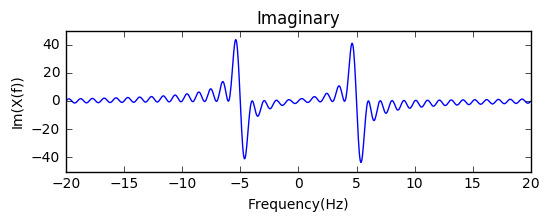

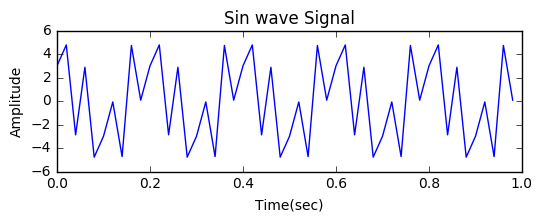

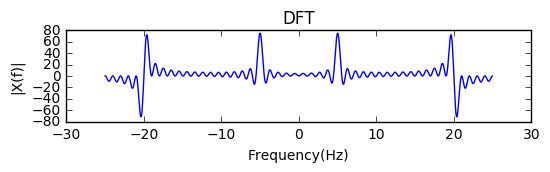

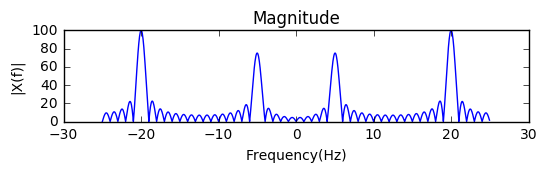

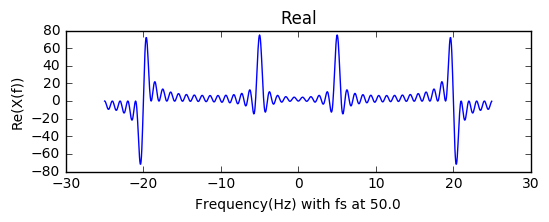

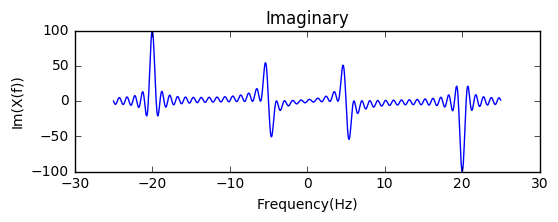

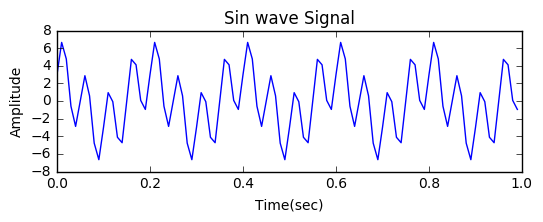

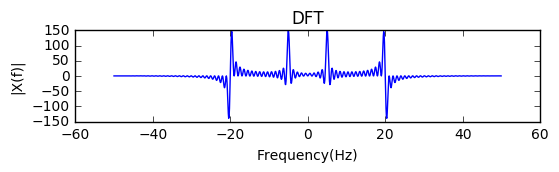

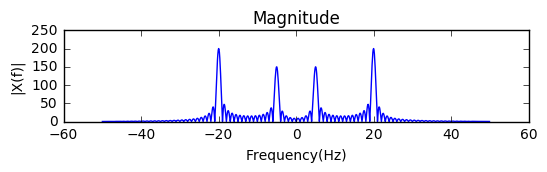

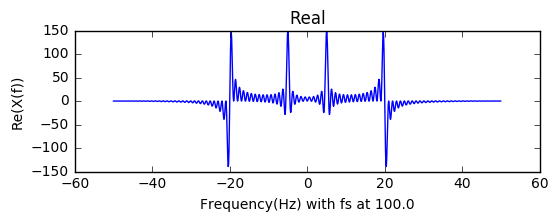

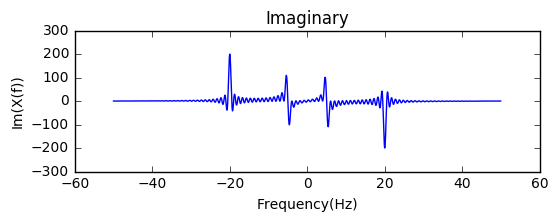

In [6]:
fs_array=[10.,20.,25.,40.,50.,100.,150.]
for i in range(0,6):
    
    # Signal frequency and sampling frequency
    f = 5.
    fs = fs_array[i]
    f1 = 5.
    f2 = 20.
    # time vector for one second
    t = np.arange(0, 1., 1./fs)
    # sin wave 
    x_n = 3*np.cos(2*np.pi*(f1)*t) + 4*np.sin(2*np.pi*(f2)*t)
    # Number of samples 
    N = 1000
    # frequency vector
    fr = (np.arange(-N/2,N/2,1)) * fs/N
    # DFT 
    # Using fftshift to have the center frequency 
    x_f = np.fft.fftshift(np.fft.fft(x_n, N))
    #x_f = x_f[0:N/2]

    plt.figure
    plt.subplot(211)
    plt.plot(t, x_n)
    plt.title('Sin wave Signal')
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    plt.show()

    plt.subplot(312)
    plt.plot(fr, x_f)
    plt.title('DFT')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('|X(f)|')
    plt.show()

    plt.subplot(313)
    plt.plot(fr, np.abs(x_f))
    plt.title('Magnitude')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('|X(f)|')
    plt.show()

    plt.figure
    plt.subplot(211)
    plt.plot(fr, np.real(x_f))
    plt.title('Real')
    plt.xlabel('Frequency(Hz) with fs at {}'.format(fs))
    plt.ylabel('Re(X(f))')
    plt.show()

    plt.subplot(212)
    plt.plot(fr, np.imag(x_f))
    plt.title('Imaginary')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Im(X(f))')
    plt.show()


**2.2.** Discuss the aliasing effects in the time domain:

**2.3** Compute the FFT of the above signals and display their centered frequency components.
Discuss your observations.

In [7]:
print ('If we take a look at the different sifnals computed, we can realise that, indeed, with a greater sampling frequency we can reconstruct better a signal. ')
print ('Looking at the FFTs and seeing that from 40 Hz we can reconstruct the original signal, we can confiorm the Shannon/Nyquist theorem: We can completely reconstruct a signal if we sample at the double of its maximum frequency.')
print ('So as the maximum frequency is 20, sampling from 40 will be enough to reconstruct it completely.')

If we take a look at the different sifnals computed, we can realise that, indeed, with a greater sampling frequency we can reconstruct better a signal. 
Looking at the FFTs and seeing that from 40 Hz we can reconstruct the original signal, we can confiorm the Shannon/Nyquist theorem: We can completely reconstruct a signal if we sample at the double of its maximum frequency.
So as the maximum frequency is 20, sampling from 40 will be enough to reconstruct it completely.


## Exercise 3 - 1D  DFT for image classification

1D DFT can be applied to analyze the frequency components along the one dimensional profile of an image. Here we want to use these information to classify the images into two different classes (**barcode** and **non-barcode** classes)
To do so we first 
* Load the images from 1D-DFT folder
    * **3.1** you have to normalize and resize the images to the smallest size 
    * **3.2** Take 1D profile as shown in the example and compute its DFT.
![](profile1.png)
    
    * **3.3** Separate the images to two different groups of **barcode** and **non-barcode** based on their frequency spectrum of their profile 
* Some information regarding the images:
    * There are 54 images while Images [1, 2, 6, 44:54] are barcode images and the others are similar patterns.
    
**3.4** Discuss your results

the minumum x is: 66
the minumum y is: 131


/home/dani/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


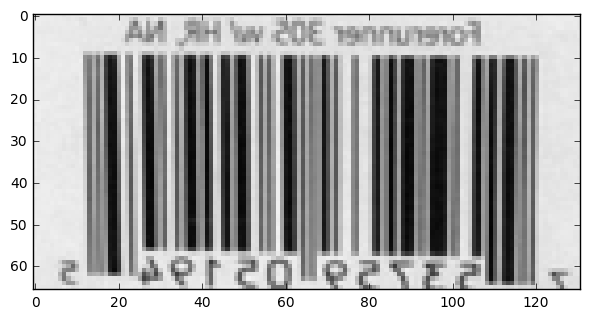

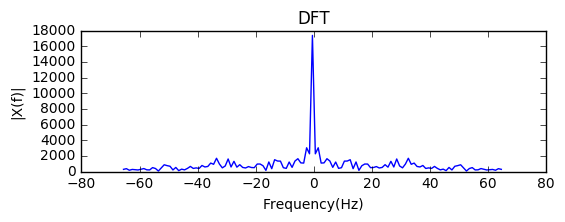

1


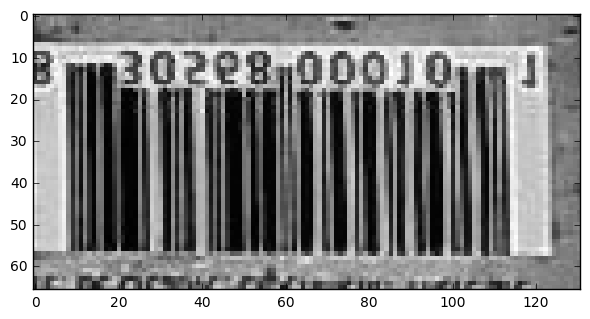

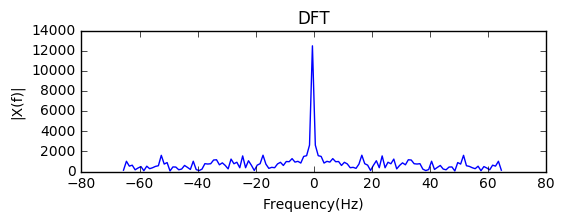

2


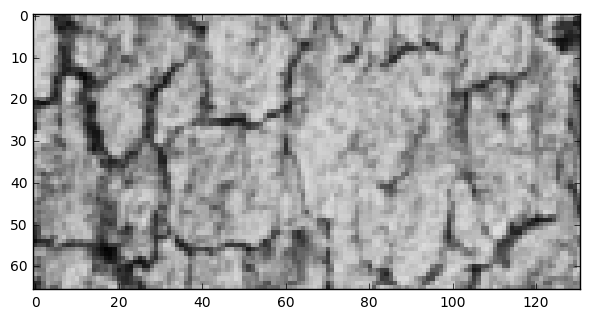

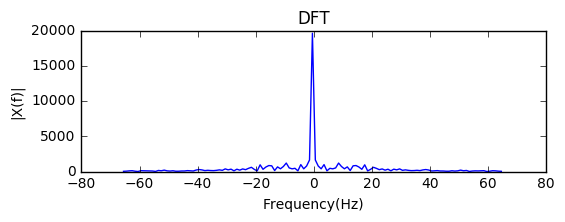

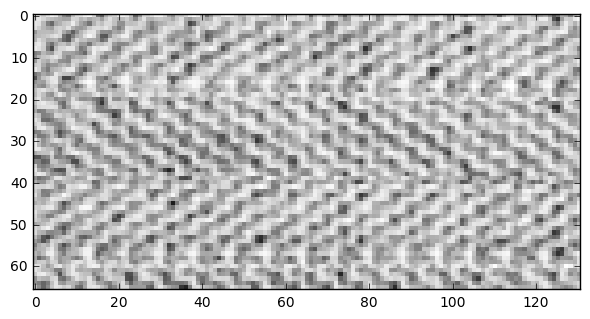

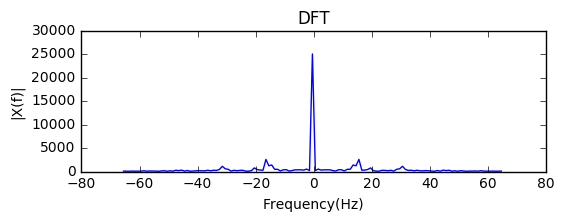

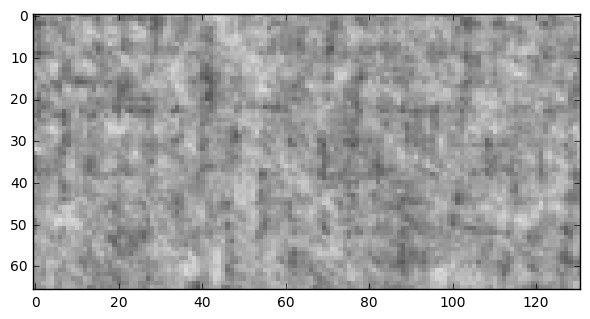

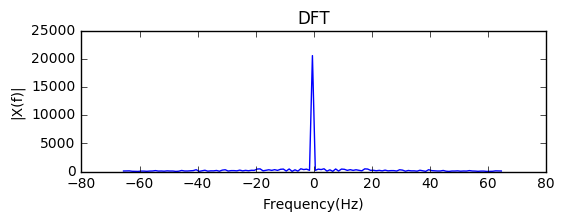

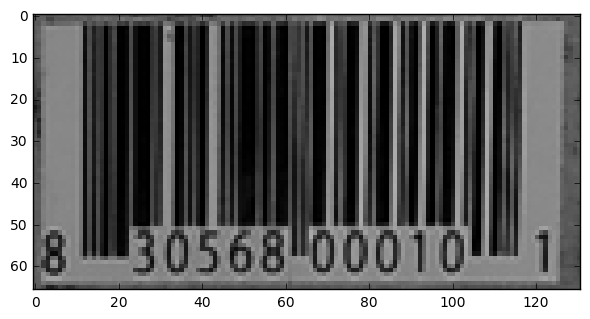

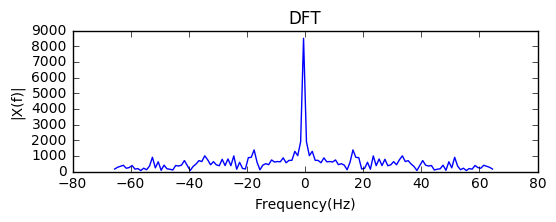

3


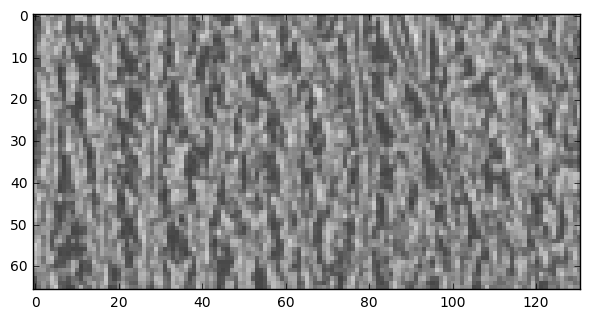

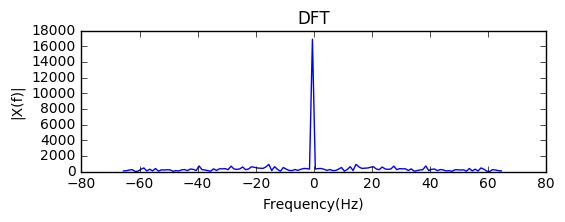

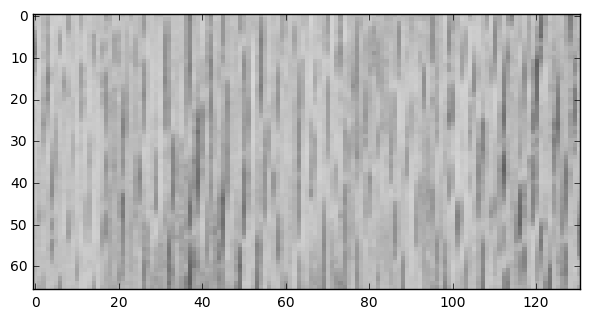

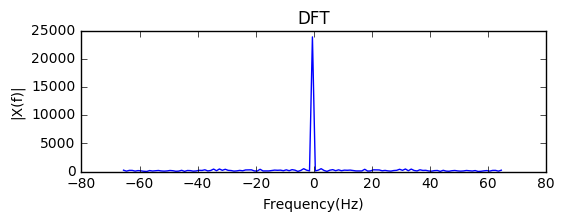

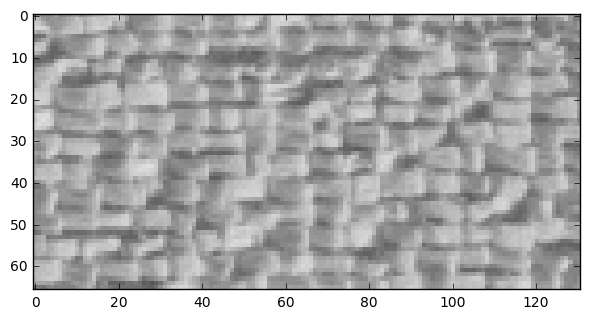

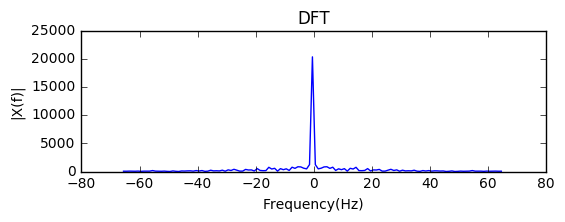

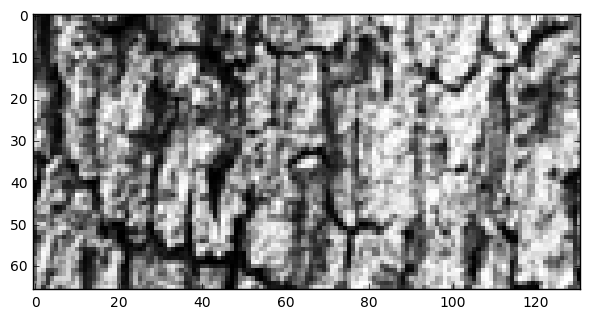

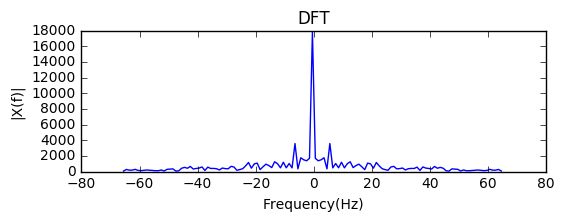

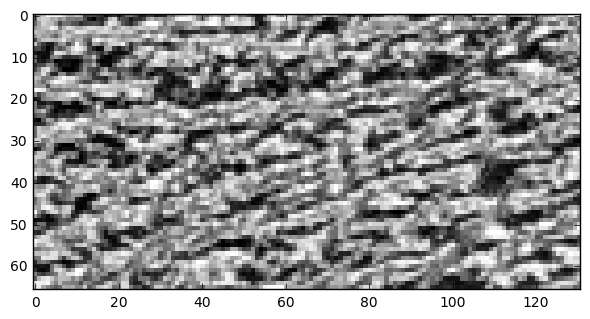

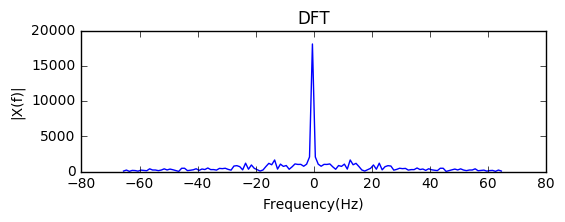

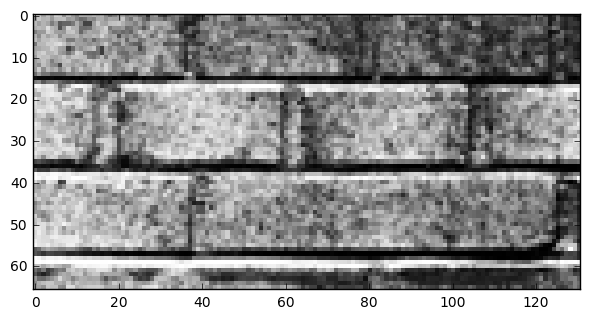

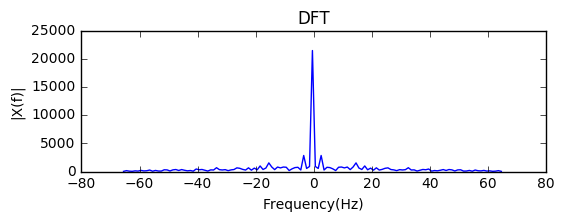

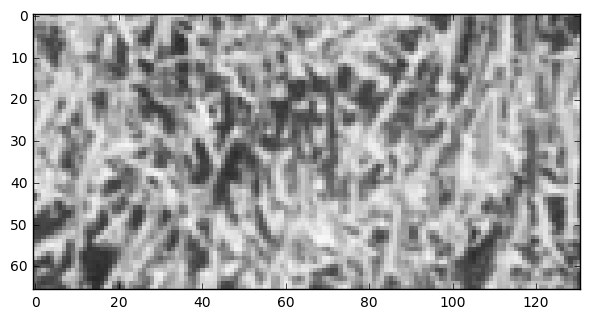

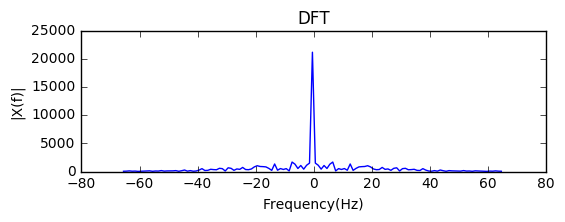

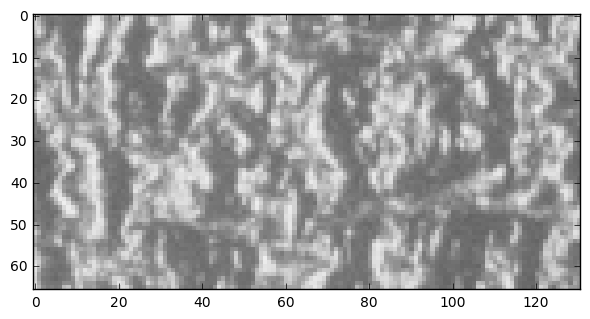

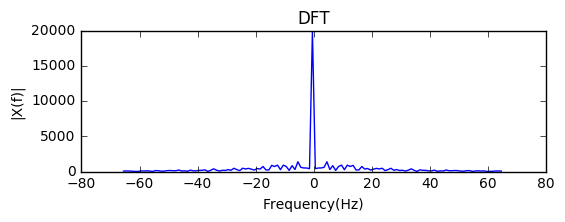

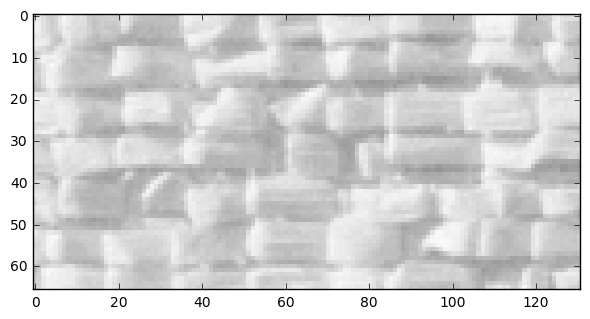

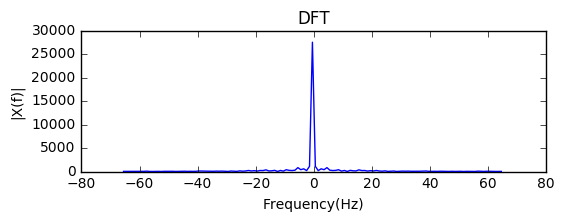

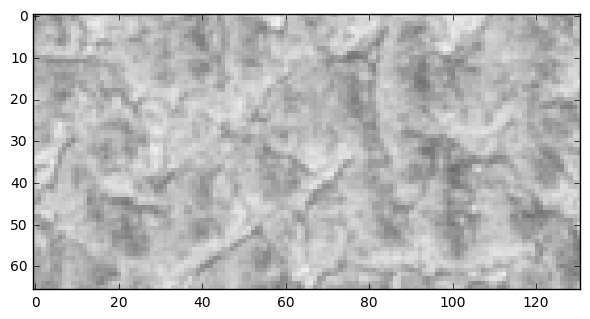

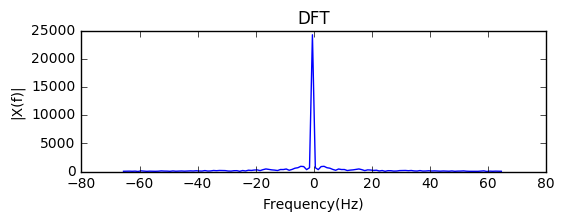

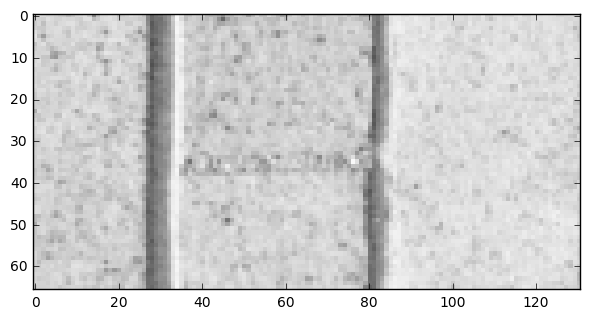

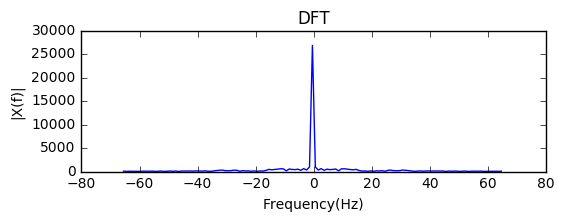

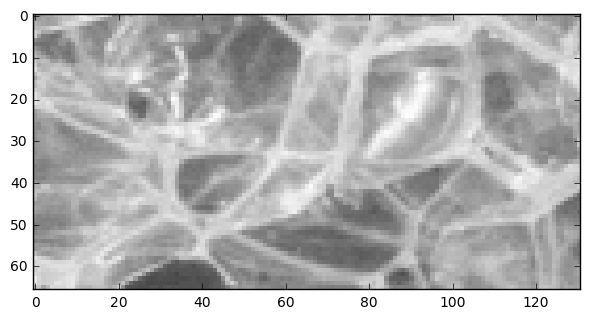

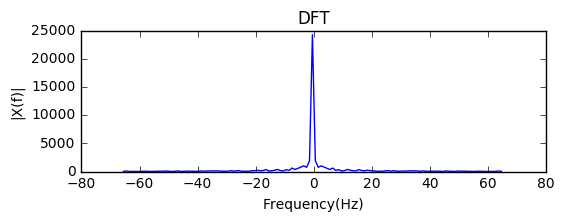

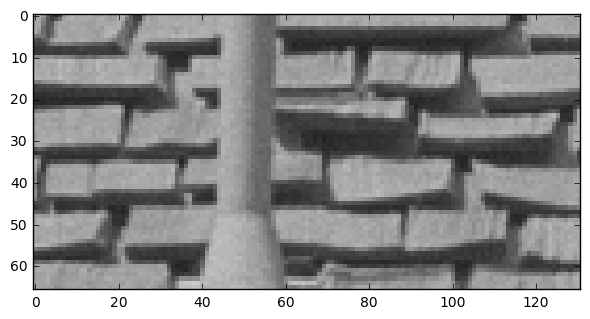

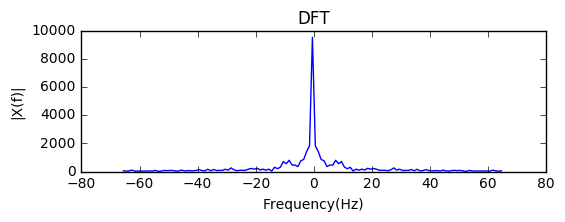

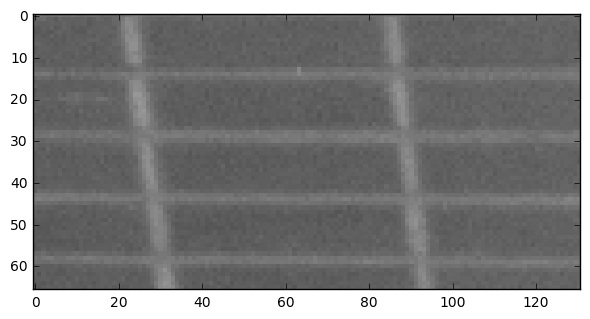

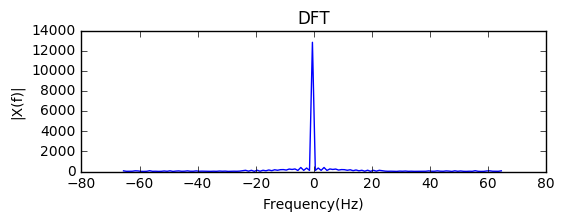

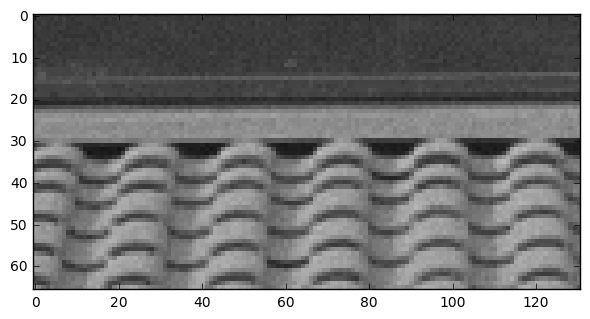

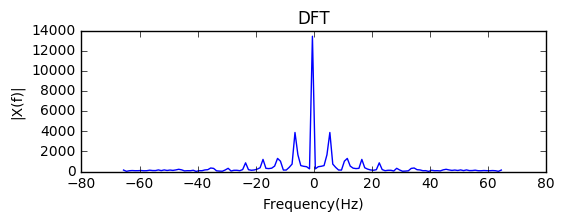

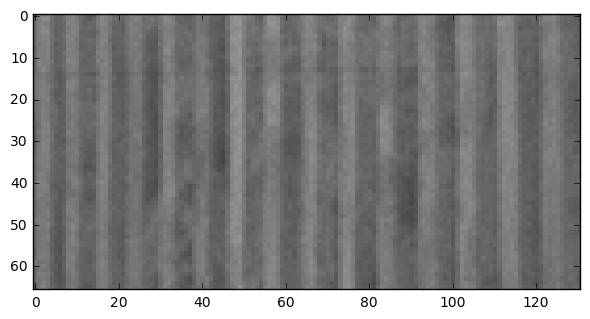

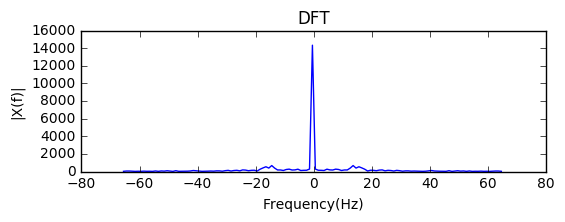

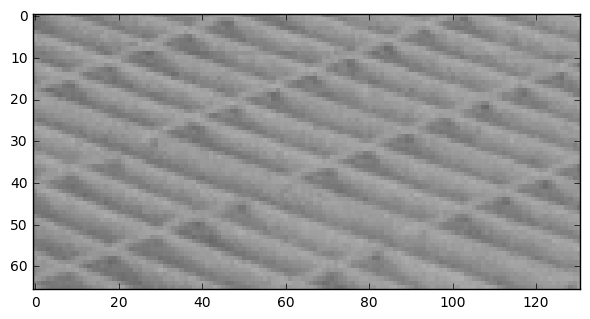

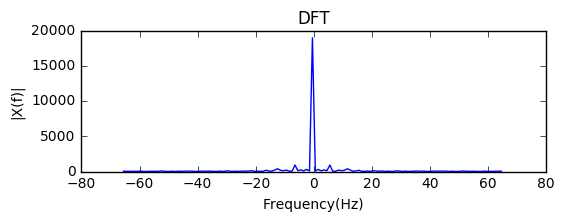

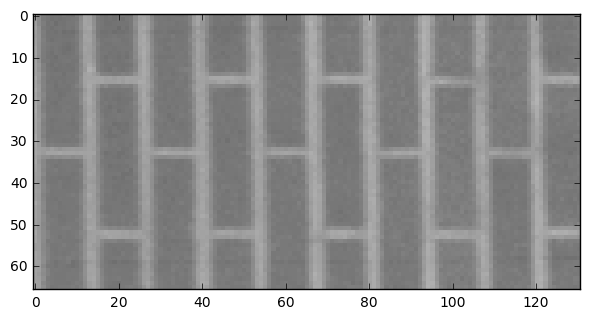

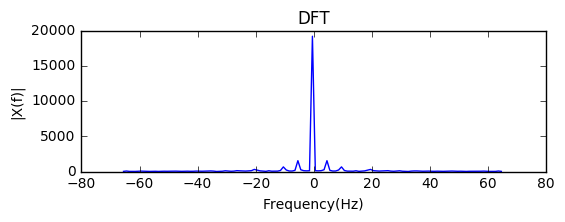

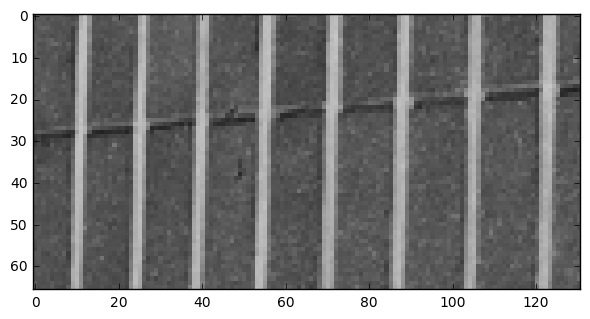

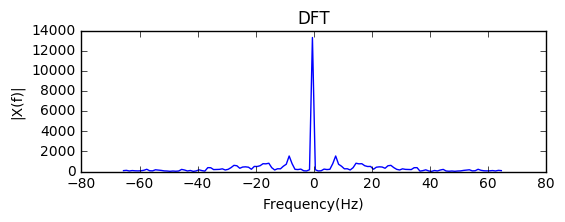

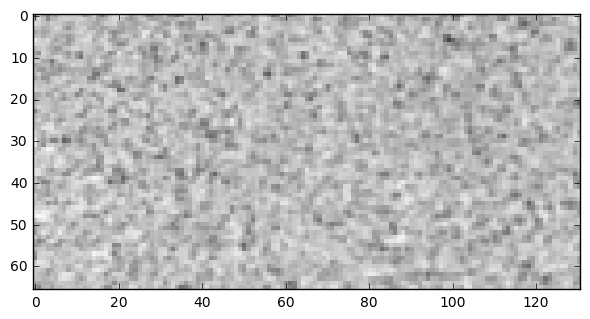

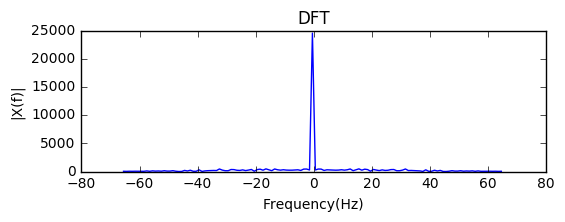

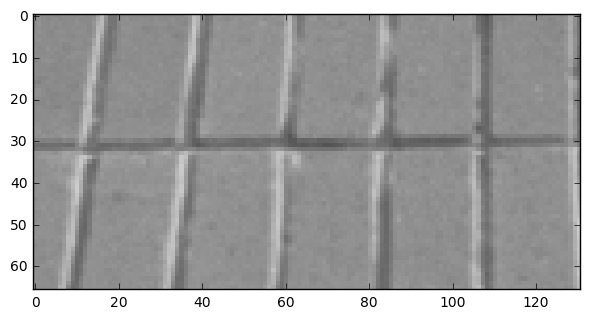

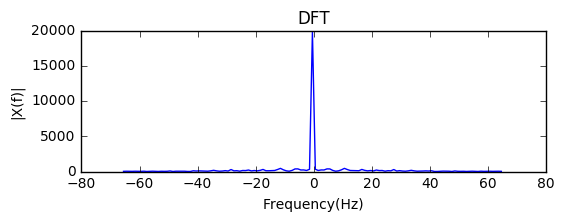

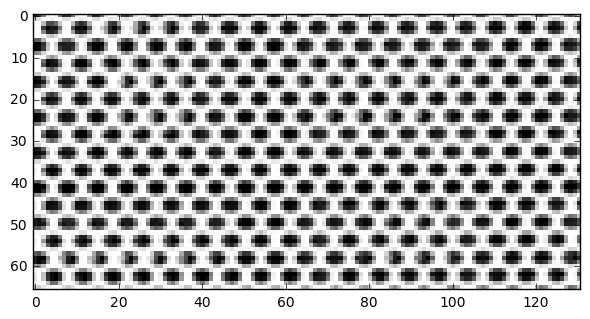

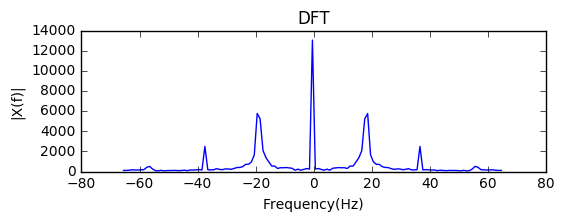

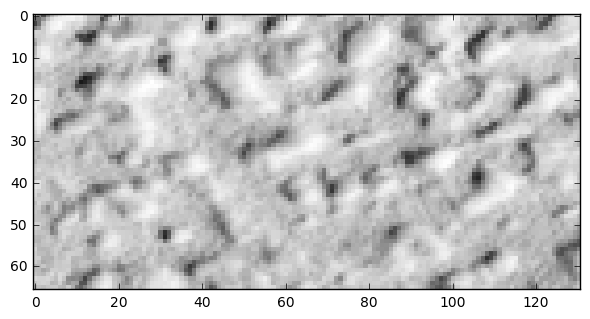

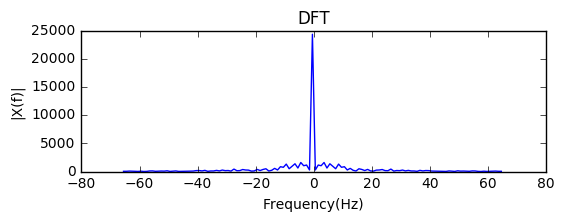

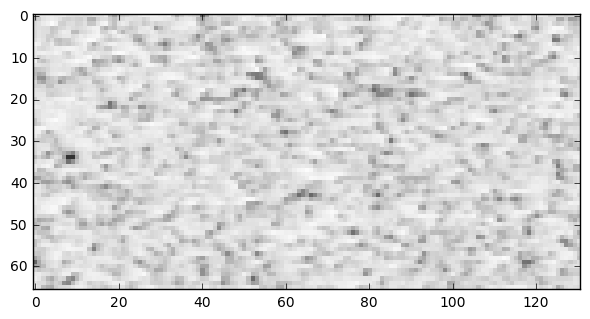

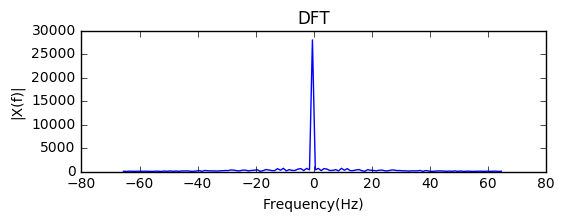

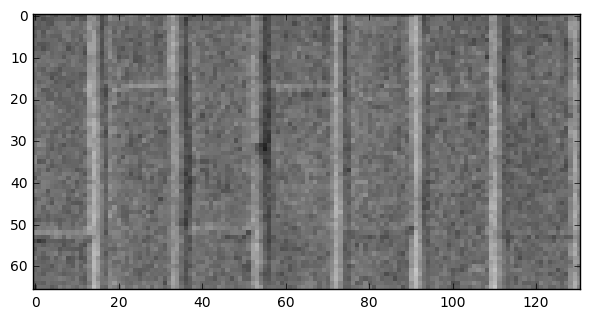

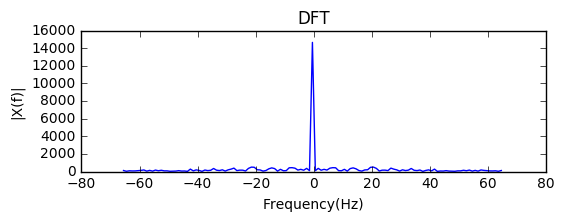

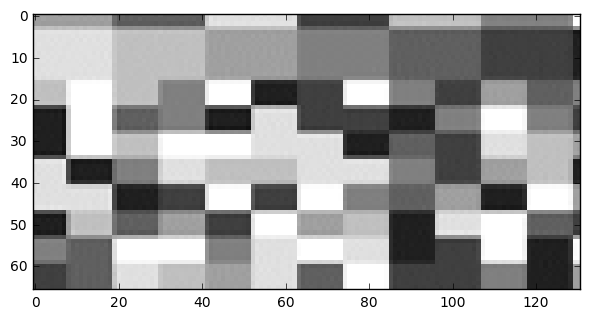

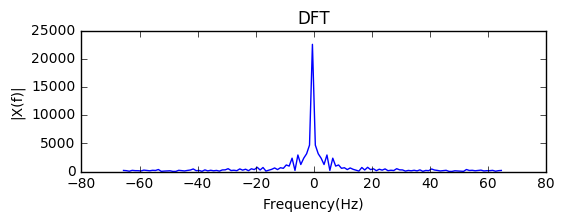

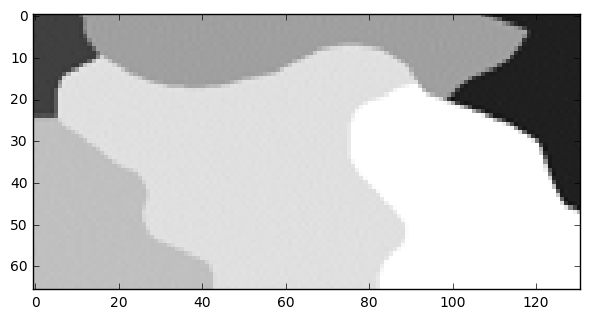

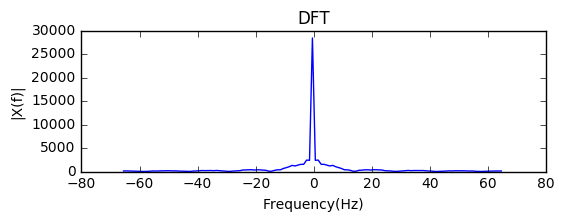

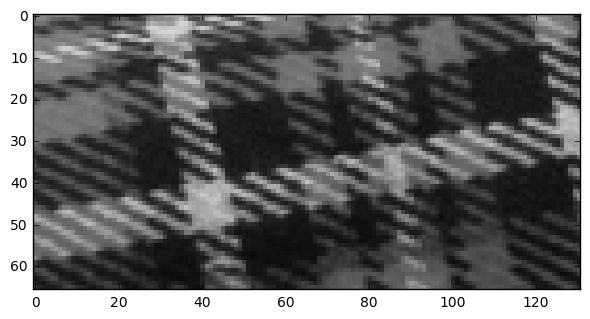

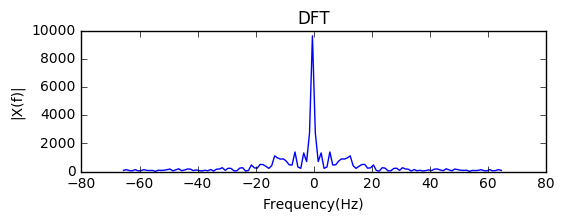

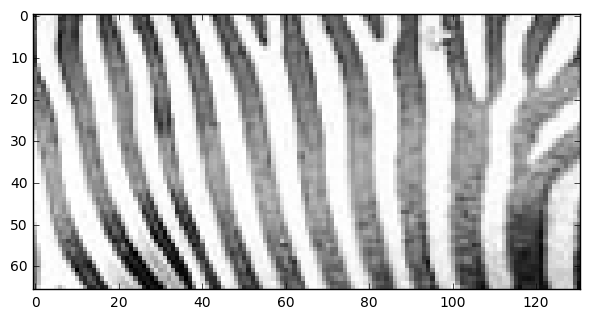

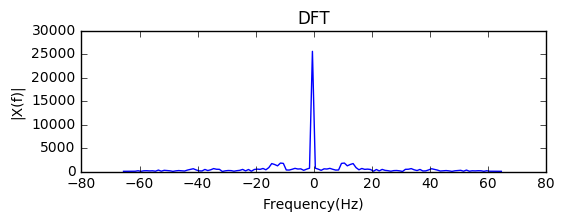

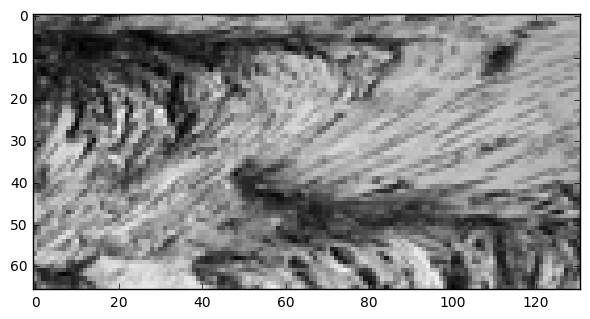

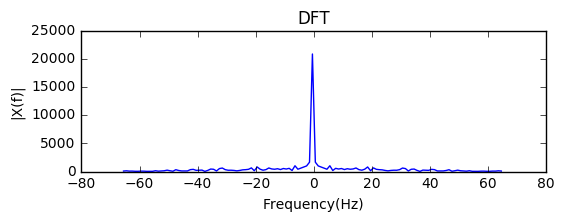

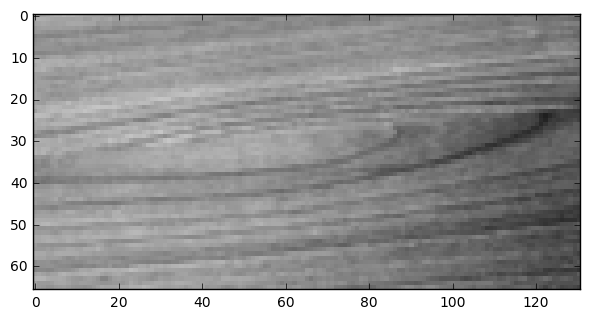

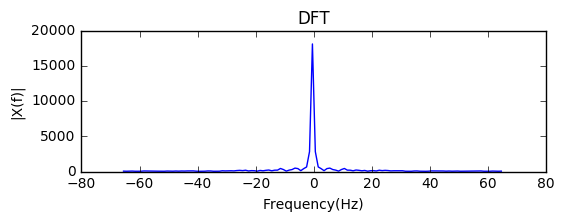

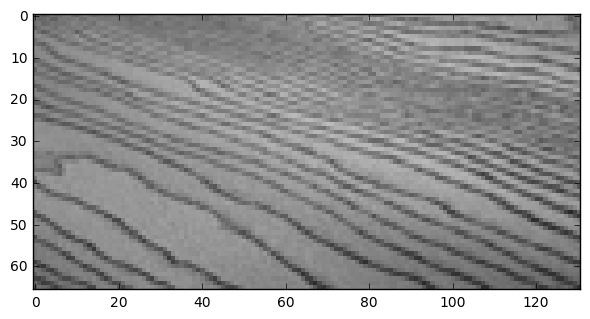

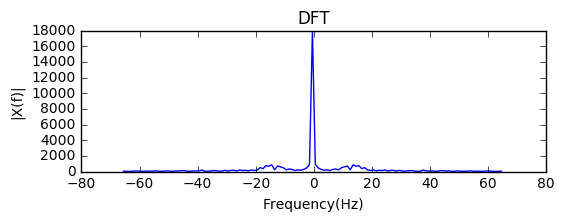

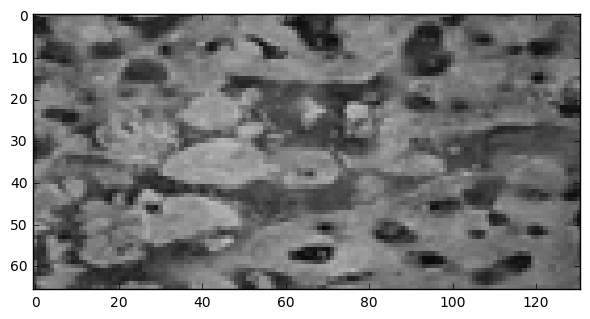

In [ ]:
def con_str(x):
    #define maximum
    max_int = np.max(x)
    #and minimum
    min_int = np.min(x)
    
    return np.round((x-min_int) * ((255. - 0.) / (max_int - min_int)) + 0.).astype('uint8')

Path = '../images/1D-DFT/'
import os, os.path
from skimage import color
from scipy import misc


filenames = sorted([f for f in os.listdir(Path)])

#setting x and y very high to initialize them
min_x=10000
min_y=10000

#loop that computes the minimum x and y of all images
for f in filenames:
    Img = io.imread(os.path.join(Path,f), as_grey=True)
    Img = con_str(Img)
    #print(np.shape(Img))            #uncomment to see the shapes of each image
    if (np.shape(Img)[0]< min_x):
        min_x = np.shape(Img)[0]
    if (np.shape(Img)[1]< min_y):
        min_y = np.shape(Img)[1]

        
print ('the minumum x is:',min_x)
print ('the minumum y is:',min_y)

profile = min_x / 2  #taking the middle row as profile

counter_barcode=0
counter_nobarcode=0

for f in filenames:
    Img = io.imread(os.path.join(Path,f), as_grey=True)
    Img = misc.imresize(Img,(min_x,min_y) , interp='bicubic',mode = None)
    plt.figure()
    io.imshow(Img)
    

    x_n = Img[profile,:]
    # frequency vector
    fr = (np.arange(-len(x_n)/2,len(x_n)/2,1))
    # DFT
    # Using fftshift to have the center frequency
    x_f = np.fft.fftshift(np.fft.fft(x_n, len(x_n)))
    #x_f = x_f[0:N/2]

    plt.figure()
    plt.subplot(211)
    plt.plot(fr, np.abs(x_f))
    plt.title('DFT')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('|X(f)|')
    plt.show()
    

    if np.sum(np.absolute(x_f[100:len(x_f)])) >8700:
        counter_barcode+=1
        print (counter_barcode)
    else:
        counter_nobarcode+=1

print ('The results are:')
print (counter_barcode, 'with barcode')
print (counter_nobarcode, 'without barcode')

In [ ]:
#What is done for dividing into barcodes and non-barcodes is focusing into the high frequencies.
#As the barcodes go from black to white and vice versa, that means that the high frequencies are boosted
#If we then set a threshold in the sum of the absolute values, the ones with more high frequencies
#will pass it, unlike the ones that don't have those hogh freqs.

#The testing for the appropiate threshold has been done by trial and error.
#That means this would take a lot of time of being computed that way, so I think this is not the best way
#to do it.

# This way of doing it with the high frequencies was given by Alpha, so thanks to him.
#A better way to implement it would be to make the profile start when the barcode part of the image starts
#But then orientations and exact locations of the barcode play a role, which makes it harder to solve